In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install torchinfo

In [4]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Download helper_functions.py")
  request = requests.get(f"https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Already exists


In [5]:
import torch
import torchvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchinfo
from torch import nn
import helper_functions
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
import requests
import zipfile
import io
from pathlib import Path

In [8]:
url = "https://zenodo.org/records/4002935/files/hirise-map-proj-v3_2.zip?download=1"
response = requests.get(url)
if response.status_code == 200:
    print("Download successful!")
else:
    print(f"Download failed with status code: {response.status_code}")
    exit()
in_memory_file = io.BytesIO(response.content)
with zipfile.ZipFile(in_memory_file, 'r') as zip_ref:
    zip_ref.extractall()

Download successful!


In [9]:
from helper_functions import walk_through_dir

data_dir = r"/kaggle/working/hirise-map-proj-v3_2"
walk_through_dir(data_dir)

There are 1 directories and 3 images in '/kaggle/working/hirise-map-proj-v3_2'.
There are 0 directories and 64947 images in '/kaggle/working/hirise-map-proj-v3_2/map-proj-v3_2'.


In [10]:
import os

image_folder_path = r'/kaggle/working/hirise-map-proj-v3_2/map-proj-v3_2'

all_files = os.listdir(image_folder_path)

data_images = []
data_labels = []

In [11]:
os.chdir(r"/kaggle/working/hirise-map-proj-v3_2/map-proj-v3_2")

In [12]:
with open(r'/kaggle/working/hirise-map-proj-v3_2/labels-map-proj_v3_2.txt') as labels:
  for line in labels:
    file_name, label = line.split(' ')
    if os.path.isfile(os.path.join(image_folder_path, file_name)):
      #print("File exists and is getting appended to data_images along with its labels in data_labels")
      data_images.append(file_name)
      data_labels.append(int(label))

In [13]:
len(data_images), len(data_labels)

(64947, 64947)

In [14]:
data_images[0], data_labels[0]

('ESP_013049_0950_RED-0067.jpg', 7)

In [15]:
import pandas as pd
df = pd.read_csv(r"/kaggle/working/hirise-map-proj-v3_2/landmarks_map-proj-v3_2_classmap.csv",index_col=0)
df

,other
0,
1,crater
2,dark dune
3,slope streak
4,bright dune
5,impact ejecta
6,swiss cheese
7,spider


In [16]:
class_names = ['other','crater','dark dune','slope streak',
                'bright dune','impact ejecta','swiss cheese','spider']
for i in range(len(class_names)):
  print(f"No. of images in data_set in class {class_names[i]} : {data_labels.count(i)}")

No. of images in data_set in class other : 52722
No. of images in data_set in class crater : 5024
No. of images in data_set in class dark dune : 766
No. of images in data_set in class slope streak : 1575
No. of images in data_set in class bright dune : 1654
No. of images in data_set in class impact ejecta : 476
No. of images in data_set in class swiss cheese : 1834
No. of images in data_set in class spider : 896


In [17]:
total_images_excluding_other = len(data_labels) - data_labels.count(0)
desired_images_per_class = int(total_images_excluding_other / len(class_names))
total_images_excluding_other, desired_images_per_class

(12225, 1528)

In [18]:
data_set = {}
data_set["file_names"] = data_images
data_set["labels"] = data_labels

In [19]:
df = pd.DataFrame.from_dict(data_set)
df.head()

,file_names,labels
0,ESP_013049_0950_RED-0067.jpg,7
1,ESP_013049_0950_RED-0067-fv.jpg,7
2,ESP_013049_0950_RED-0067-brt.jpg,7
3,ESP_013049_0950_RED-0067-r90.jpg,7
4,ESP_013049_0950_RED-0067-r180.jpg,7


# DownSampling

In [20]:
from sklearn.utils import resample
df_1 = df[df['labels'] == 0]
df_2 = df[df['labels'] != 0]
df_1_downsample = resample(df_1,random_state=42,n_samples=1000,replace=True)

#concatenate the upsampled dataframe
df_downsample = pd.concat([df_1_downsample, df_2]).reset_index(drop=True)
df = df_downsample
df
from sklearn.utils import resample
df_1 = df[df['labels'] == 1]
df_2 = df[df['labels'] != 1]
df_1_downsample = resample(df_1,random_state=42,n_samples=1700,replace=True)

#concatenate the upsampled dataframe
df_downsample = pd.concat([df_1_downsample, df_2]).reset_index(drop=True)
df = df_downsample
df

,file_names,labels
0,ESP_026472_1410_RED-0372-brt.jpg,1
1,PSP_002776_2025_RED-0085-brt.jpg,1
2,ESP_029782_2075_RED-0746-fv.jpg,1
3,ESP_034590_1795_RED-0162-r180.jpg,1
4,ESP_016607_2080_RED-0264-r180.jpg,1
...,...,...
9896,PSP_004673_0935_RED-0091.jpg,6
9897,PSP_004673_0935_RED-0140.jpg,6
9898,PSP_004673_0935_RED-0070.jpg,6
9899,PSP_004673_0935_RED-0047.jpg,6


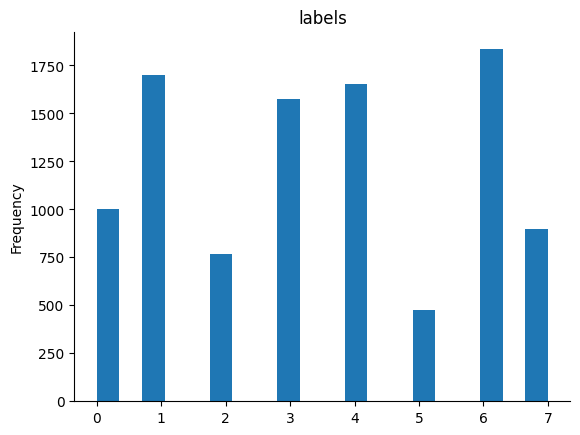

In [21]:
# @title labels

from matplotlib import pyplot as plt
df_downsample['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
X, y = df["file_names"], df["labels"]
X, y = (X).to_list(), y.to_list()
X[:5], y[:5]

(['ESP_026472_1410_RED-0372-brt.jpg',
  'PSP_002776_2025_RED-0085-brt.jpg',
  'ESP_029782_2075_RED-0746-fv.jpg',
  'ESP_034590_1795_RED-0162-r180.jpg',
  'ESP_016607_2080_RED-0264-r180.jpg'],
 [1, 1, 1, 1, 1])

In [23]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

len(X_train), len(X_test), len(y_train), len(y_test)

(7920, 1981, 7920, 1981)

In [24]:
X[:5]

['ESP_026472_1410_RED-0372-brt.jpg',
 'PSP_002776_2025_RED-0085-brt.jpg',
 'ESP_029782_2075_RED-0746-fv.jpg',
 'ESP_034590_1795_RED-0162-r180.jpg',
 'ESP_016607_2080_RED-0264-r180.jpg']

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class ImageDataset(Dataset):
    def __init__(self, image_list, label_list, device, transform=None):
        self.image_list = image_list
        self.transform = transform
        self.label_list = label_list
        self.parsed_image_list = []
        for i in self.image_list:
            i = self.parse_image(i)
            i = i.convert('RGB')  # Convert grayscale image to RGB
            self.parsed_image_list.append(i)
        
      # Read a PIL image
    def parse_image(self, image_file):
        image = Image.open(image_file)
        # transform = transforms.PILToTensor()
        # Convert the PIL image to Torch tensor
        #img_tensor = transform(image)
        return image

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        return self.parsed_image_list[idx], self.label_list[idx]

In [26]:
# Define transforms for training
transforms = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [0, 1]
])


# Create datasets
train_dataset = ImageDataset(X_train, y_train, transform=None, device=device)
test_dataset = ImageDataset(X_test, y_test, transform=None, device=device)

crater


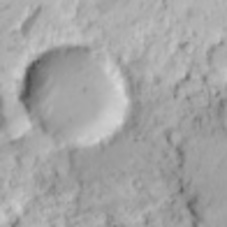

In [27]:
print(class_names[train_dataset[0][1]])
train_dataset[0][0]

In [28]:
from transformers import BeitImageProcessor
model_name = r"microsoft/beit-base-patch16-224-pt22k"
processor = BeitImageProcessor.from_pretrained(model_name, return_tensors = 'pt')

def apply_processor(img, label):
    inputs = {}
    inputs['pixel_values'] = processor(img, return_tensors="pt").pixel_values.squeeze()
    inputs["label"] = label
    return inputs

#processed_dataset = X_train.map(apply_processor)

2024-05-27 06:31:22.140945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 06:31:22.141092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 06:31:22.270505: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

In [29]:
train_input_array = []
for i in range(len(train_dataset)):
    train_input_array.append(apply_processor(train_dataset[i][0], train_dataset[i][1]))

In [30]:
test_input_array = []
for i in range(len(test_dataset)):
    test_input_array.append(apply_processor(test_dataset[i][0], test_dataset[i][1]))

In [31]:
# Assuming you have 7 classes
custom_id2label = {i: class_name for i, class_name in enumerate(class_names)}
custom_label2id = {class_name: i for i, class_name in enumerate(class_names)}

custom_id2label, custom_label2id

({0: 'other',
  1: 'crater',
  2: 'dark dune',
  3: 'slope streak',
  4: 'bright dune',
  5: 'impact ejecta',
  6: 'swiss cheese',
  7: 'spider'},
 {'other': 0,
  'crater': 1,
  'dark dune': 2,
  'slope streak': 3,
  'bright dune': 4,
  'impact ejecta': 5,
  'swiss cheese': 6,
  'spider': 7})

In [32]:
from transformers import BeitForImageClassification
model = BeitForImageClassification.from_pretrained(model_name,
                                                  id2label=custom_id2label,
                                                  label2id=custom_label2id,
                                                  ignore_mismatched_sizes=True)
processor = BeitImageProcessor.from_pretrained(model_name, do_rescale = False, return_tensors = 'pt')

config.json:   0%|          | 0.00/736 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/368M [00:00<?, ?B/s]

Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224-pt22k and are newly initialized: ['beit.pooler.layernorm.bias', 'beit.pooler.layernorm.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
from transformers import EvalPrediction
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, cohen_kappa_score
from sklearn.utils.multiclass import unique_labels

def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)

  # Basic metrics
  accuracy = accuracy_score(predictions, labels)
  precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

  # Confusion Matrix
  confusion_matrix_ = confusion_matrix(labels, predictions)

  # Class-balanced Accuracy (assuming unique labels)
  class_balanced_accuracy = np.mean(np.diag(confusion_matrix_) / np.sum(confusion_matrix_, axis=1))


  # Kappa Statistic
  kappa = cohen_kappa_score(labels, predictions)

  # ROC Curve (requires probability estimates)
  if hasattr(eval_pred, "predictions"):
    if hasattr(eval_pred.predictions, "predictions"):
      # Assuming predictions contain probabilities
      roc_auc = roc_auc_score(labels, eval_pred.predictions.predictions[:, 1])  # Assuming second column is positive class probability
    else:
      roc_auc = None
  else:
    roc_auc = None

  # Combine all metrics
  return {
      "accuracy": accuracy,
      "precision": precision,
      "recall": recall,
      "f1": f1,
      "confusion_matrix": confusion_matrix_.tolist(),  # Convert to list for serialization
      "class_balanced_accuracy": class_balanced_accuracy,
      "kappa": kappa,
      "ROC_AUC": roc_auc
  }


In [34]:
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

# TrainingArguments and Trainer

In [35]:
from transformers import TrainingArguments, Trainer

metric_name = "accuracy"

# Define Train Parameters
args = TrainingArguments(
    f"HiRise-BeiT-classification",
    use_cpu = False,
    evaluation_strategy="steps",
    logging_steps = 100,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
)

In [36]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=train_input_array,
    eval_dataset=test_input_array,
    tokenizer=processor,
)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [37]:
os.chdir("/kaggle/working/")
os.mkdir("models")
model_dir = "/kaggle/working/models/"

In [40]:
train_results = trainer.train()
# save tokenizer with the model
trainer.save_model(model_dir + "HiRise_BeiT")

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Confusion Matrix,Class Balanced Accuracy,Kappa,Roc Auc
100,0.799300,0.321267,0.892983,0.895955,0.892983,0.889042,"[[135, 17, 0, 29, 0, 2, 1, 3], [33, 297, 4, 15, 1, 3, 2, 1], [3, 0, 135, 4, 4, 0, 3, 7], [1, 2, 1, 305, 0, 0, 0, 0], [0, 0, 0, 0, 341, 0, 0, 0], [13, 14, 2, 15, 0, 52, 2, 13], [0, 0, 4, 0, 0, 0, 347, 0], [9, 1, 3, 0, 0, 0, 0, 157]]",0.848655,0.874770,None
200,0.238200,0.167864,0.951035,0.950842,0.951035,0.950538,"[[151, 15, 0, 14, 0, 5, 0, 2], [16, 334, 1, 2, 0, 3, 0, 0], [0, 0, 153, 1, 0, 0, 0, 2], [1, 1, 0, 307, 0, 0, 0, 0], [0, 0, 0, 0, 341, 0, 0, 0], [8, 2, 0, 4, 0, 89, 0, 8], [0, 0, 4, 0, 0, 0, 347, 0], [7, 0, 0, 1, 0, 0, 0, 162]]",0.932917,0.942812,None
300,0.131300,0.140180,0.960626,0.960611,0.960626,0.960011,"[[153, 19, 0, 11, 0, 2, 0, 2], [8, 347, 0, 1, 0, 0, 0, 0], [0, 2, 152, 1, 0, 0, 0, 1], [3, 2, 1, 303, 0, 0, 0, 0], [0, 0, 0, 0, 341, 0, 0, 0], [8, 2, 0, 1, 0, 92, 1, 7], [0, 0, 4, 0, 0, 0, 347, 0], [2, 0, 0, 0, 0, 0, 0, 168]]",0.944189,0.953983,None


Trainer is attempting to log a value of "[[135, 17, 0, 29, 0, 2, 1, 3], [33, 297, 4, 15, 1, 3, 2, 1], [3, 0, 135, 4, 4, 0, 3, 7], [1, 2, 1, 305, 0, 0, 0, 0], [0, 0, 0, 0, 341, 0, 0, 0], [13, 14, 2, 15, 0, 52, 2, 13], [0, 0, 4, 0, 0, 0, 347, 0], [9, 1, 3, 0, 0, 0, 0, 157]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "None" of type <class 'NoneType'> for key "eval/ROC_AUC" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Trainer is attempting to log a value of "[[151, 15, 0, 14, 0, 5, 0, 2], [16, 334, 

In [41]:
os.chdir("/kaggle/working/")

In [44]:
beit_metrics = trainer.evaluate()
beit_metrics["Model_Name"] = "BeiT-HiRise"
beit_metrics
beit_metrics = {"Model_2_Metrics" : beit_metrics}
beit_metrics

Trainer is attempting to log a value of "[[152, 20, 0, 11, 0, 2, 0, 2], [8, 347, 0, 1, 0, 0, 0, 0], [0, 2, 152, 1, 0, 0, 0, 1], [3, 2, 1, 303, 0, 0, 0, 0], [0, 0, 0, 0, 341, 0, 0, 0], [8, 2, 0, 1, 0, 92, 1, 7], [0, 0, 4, 0, 0, 0, 347, 0], [2, 0, 0, 0, 0, 1, 0, 167]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "None" of type <class 'NoneType'> for key "eval/ROC_AUC" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


{'Model_2_Metrics': {'eval_loss': 0.13901975750923157,
  'eval_accuracy': 0.9596163553760727,
  'eval_precision': 0.9594913278368966,
  'eval_recall': 0.9596163553760727,
  'eval_f1': 0.9589739537037213,
  'eval_confusion_matrix': [[152, 20, 0, 11, 0, 2, 0, 2],
   [8, 347, 0, 1, 0, 0, 0, 0],
   [0, 2, 152, 1, 0, 0, 0, 1],
   [3, 2, 1, 303, 0, 0, 0, 0],
   [0, 0, 0, 0, 341, 0, 0, 0],
   [8, 2, 0, 1, 0, 92, 1, 7],
   [0, 0, 4, 0, 0, 0, 347, 0],
   [2, 0, 0, 0, 0, 1, 0, 167]],
  'eval_class_balanced_accuracy': 0.9427850728703291,
  'eval_kappa': 0.952801207250292,
  'eval_ROC_AUC': None,
  'eval_runtime': 12.942,
  'eval_samples_per_second': 153.068,
  'eval_steps_per_second': 1.236,
  'epoch': 5.0,
  'Model_Name': 'BeiT-HiRise'}}

In [45]:
#Convert and write JSON object to file
import json 
with open("beit_metrics.json", "w") as outfile: 
    json.dump(beit_metrics, outfile)
beit_metrics_loaded = pd.read_json("/kaggle/working/beit_metrics.json", orient="index")
beit_metrics_loaded

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_confusion_matrix,eval_class_balanced_accuracy,eval_kappa,eval_ROC_AUC,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,Model_Name
Model_2_Metrics,0.13902,0.959616,0.959491,0.959616,0.958974,"[[152, 20, 0, 11, 0, 2, 0, 2], [8, 347, 0, 1, ...",0.942785,0.952801,NaN,12.942,153.068,1.236,5,BeiT-HiRise


# Visualize and evaluate predictions of the model

In [57]:
test_imgs = []
test_labels = []
for i in test_input_array[:16]:
    test_imgs.append(i["pixel_values"])
    test_labels.append(i["label"])

In [58]:
test_imgs[0], test_labels[0]

(tensor([[[-0.2235, -0.2078, -0.1608,  ..., -0.3098, -0.3255, -0.3490],
          [-0.2314, -0.2157, -0.1686,  ..., -0.3098, -0.3255, -0.3333],
          [-0.2471, -0.2314, -0.1922,  ..., -0.2941, -0.3020, -0.3020],
          ...,
          [-0.5608, -0.5765, -0.6000,  ..., -0.0902, -0.0980, -0.0980],
          [-0.5294, -0.5529, -0.5922,  ..., -0.0824, -0.0902, -0.0902],
          [-0.5216, -0.5529, -0.5922,  ..., -0.0902, -0.0824, -0.0824]],
 
         [[-0.2235, -0.2078, -0.1608,  ..., -0.3098, -0.3255, -0.3490],
          [-0.2314, -0.2157, -0.1686,  ..., -0.3098, -0.3255, -0.3333],
          [-0.2471, -0.2314, -0.1922,  ..., -0.2941, -0.3020, -0.3020],
          ...,
          [-0.5608, -0.5765, -0.6000,  ..., -0.0902, -0.0980, -0.0980],
          [-0.5294, -0.5529, -0.5922,  ..., -0.0824, -0.0902, -0.0902],
          [-0.5216, -0.5529, -0.5922,  ..., -0.0902, -0.0824, -0.0824]],
 
         [[-0.2235, -0.2078, -0.1608,  ..., -0.3098, -0.3255, -0.3490],
          [-0.2314, -0.2157,

In [59]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.logits.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [60]:
pred_probs = make_predictions(model=model,
                              data=test_imgs)
pred_probs

tensor([[9.9537e-01, 4.2931e-04, 6.8154e-04, 1.1142e-03, 6.1607e-05, 1.3757e-03,
         7.6032e-05, 8.9242e-04],
        [9.1355e-01, 2.2788e-04, 2.3604e-04, 8.0023e-02, 3.8214e-05, 5.3090e-03,
         2.9930e-04, 3.1449e-04],
        [9.5122e-01, 1.5364e-03, 8.9313e-04, 4.5559e-02, 1.8046e-05, 5.6437e-04,
         3.9448e-05, 1.7272e-04],
        [5.0175e-04, 9.9372e-01, 6.3017e-05, 8.0460e-05, 1.3520e-04, 2.5386e-04,
         5.2084e-03, 3.9041e-05],
        [3.3560e-04, 1.3317e-04, 9.9761e-01, 1.4210e-04, 1.5513e-04, 3.7869e-05,
         2.5616e-04, 1.3319e-03],
        [1.4707e-03, 8.7487e-05, 1.2533e-04, 9.9800e-01, 1.2689e-05, 2.4208e-04,
         3.2031e-05, 3.0335e-05],
        [1.5383e-03, 9.9782e-01, 1.0690e-04, 1.7177e-04, 4.5730e-05, 1.4197e-04,
         4.5585e-05, 1.2664e-04],
        [3.0563e-05, 6.9809e-05, 2.6169e-04, 8.0799e-06, 9.9917e-01, 1.2096e-04,
         1.4513e-04, 1.9460e-04],
        [3.1370e-04, 9.9924e-01, 2.8796e-05, 5.8799e-05, 5.6722e-05, 9.1893e-05,

In [61]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([0, 0, 0, 1, 2, 3, 1, 4, 1, 3, 6, 3, 7, 2, 0, 7]),
 [0, 0, 0, 1, 2, 3, 1, 4, 1, 3, 6, 3, 7, 2, 0, 7])

In [62]:
test_imgs[0].shape

torch.Size([3, 224, 224])

In [63]:
image = test_imgs[0][-1, :, :]
image.shape

torch.Size([224, 224])

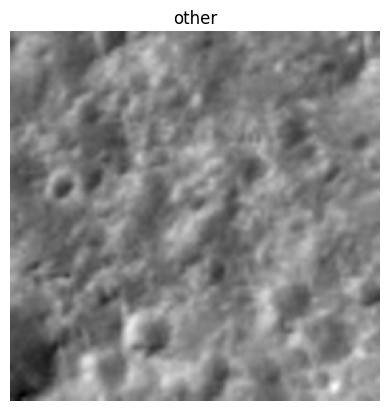

In [64]:
plt.imshow(test_imgs[0][-1, :, :], cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False);

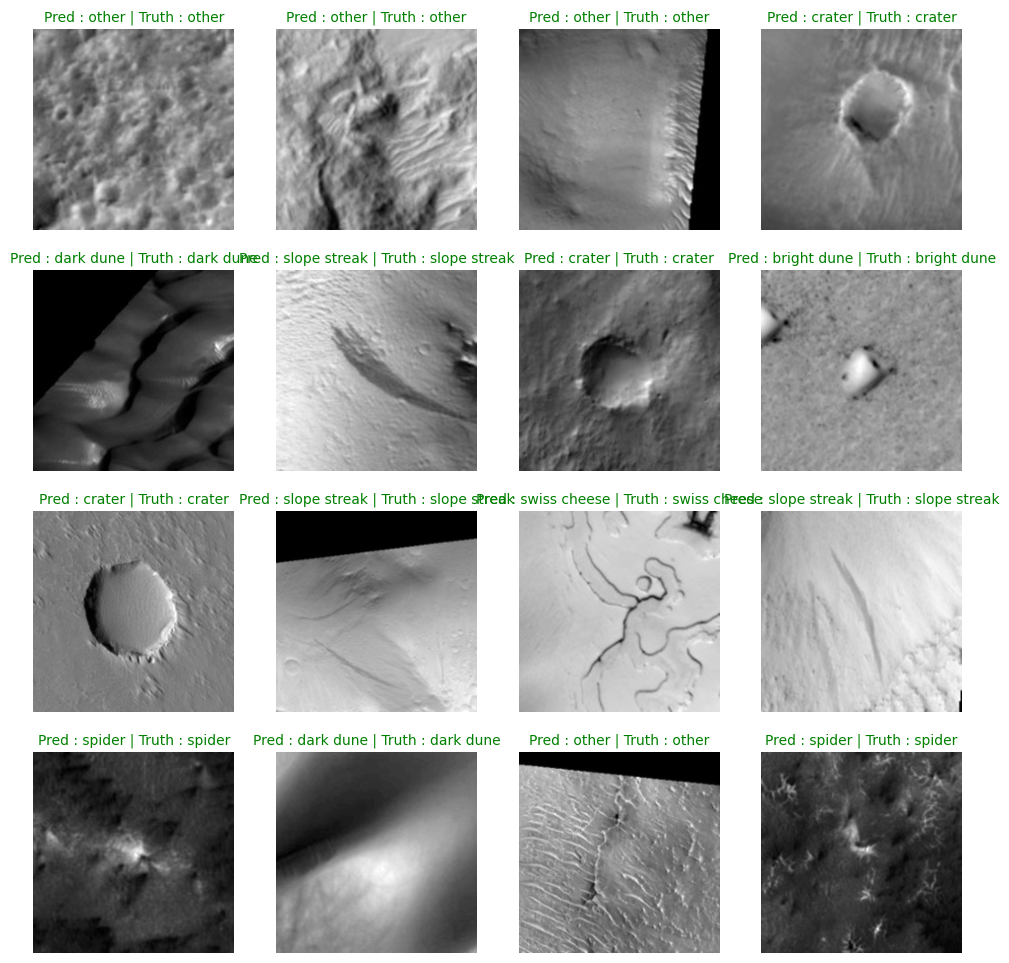

In [65]:
plt.figure(figsize=(12, 12))
nrows, ncols = 4, 4
for i, sample in enumerate(test_imgs):
    plt.subplot(nrows, ncols, i+1)
    sample = sample[-1, :, :]
    plt.imshow(sample.squeeze(), cmap = "gray")
    plt.axis(False);
    
    pred_label = class_names[pred_classes[i]]
    
    truth_label = class_names[test_labels[i]]
    
    title_text = f"Pred : {pred_label} | Truth : {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    
    else:
        plt.title(title_text, fontsize=10, c="r")